In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
%matplotlib inline
pd.DataFrame 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


pandas.core.frame.DataFrame

**1.**

In [2]:
from sklearn.datasets import load_boston

In [3]:
bostondf = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
# field names or keys to dictionary
print(bostondf.keys())   

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [25]:
print(bostondf.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston = pd.DataFrame(bostondf.data, columns=bostondf.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston['MEDV'] = bostondf.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
y = boston['MEDV'].copy()
del boston['MEDV']
boston = pd.concat((y, boston), axis=1)

In [9]:
x = boston['RM'].copy()
del boston['RM']
boston = pd.concat((x, boston), axis=1)

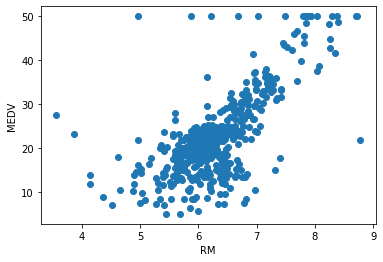

In [10]:
plt.scatter(x, y)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [11]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


In [12]:
cols = ['RM', 'LSTAT', 'MEDV']
boston[cols].corr()

,RM,LSTAT,MEDV
RM,1.000000,-0.613808,0.695360
LSTAT,-0.613808,1.000000,-0.737663
MEDV,0.695360,-0.737663,1.000000


In [13]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


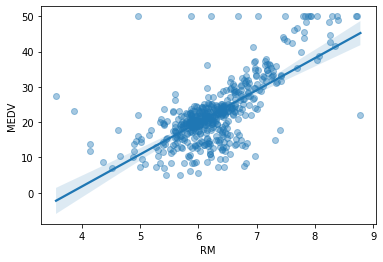

In [14]:
fig, ax = plt.subplots(1, 1)
sns.regplot('RM', 'MEDV', boston,
            scatter_kws={'alpha': 0.4}) 
# shaded area is 95% CI

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


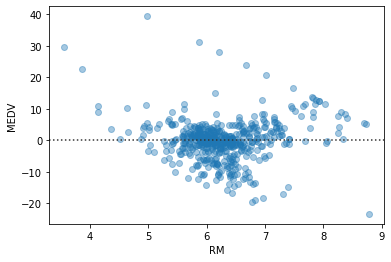

In [15]:
fig, ax = plt.subplots(1, 1)
sns.residplot('RM', 'MEDV', boston, scatter_kws={'alpha': 0.4})

Each point on these residual plots is the difference between that sample and the linear model prediction. Residuals greater than zero are data points that would be underestimated by the model.Residuals less than zero are data points that would be overestimated by the model.

**2.**

In [16]:
def get_mse(boston, feature, target='MEDV'):
    # Get x, y to model
    y = boston[target].values
    x = boston[feature].values.reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '')

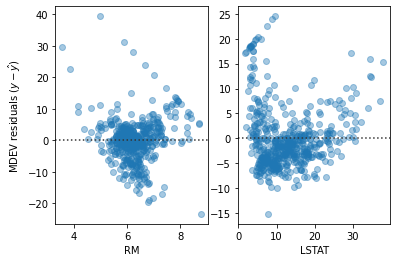

In [17]:
fig, ax = plt.subplots(1, 2)
ax[0] = sns.residplot('RM', 'MEDV', boston, ax=ax[0],
                      scatter_kws={'alpha': 0.4})
ax[0].set_ylabel('MDEV residuals $(y-\hat{y})$')
ax[1] = sns.residplot('LSTAT', 'MEDV', boston, ax=ax[1],
                      scatter_kws={'alpha': 0.4})
ax[1].set_ylabel('')

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
clf = LinearRegression()
y = boston['MEDV'].values
x = boston['LSTAT'].values.reshape(-1,1)
x_poly = poly.fit_transform(x)
clf.fit(x_poly, y)
y_pred = clf.predict(x_poly)
resid_MEDV = y - y_pred

In [19]:
import statsmodels.api as sm
X = boston[['RM','LSTAT']] 
Y = boston['MEDV']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sun, 27 Feb 2022   Prob (F-statistic):          7.01e-112
Time:                        12:03:45   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 is goodness of fit. R2= .948 means that the strength of the relationship between your model and the dependent variable is 94.8%

In [20]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
X =np.arange(len(boston[['RM']]))
Y = np.asarray(boston[['RM']])
X = sm.add_constant(X)
ols_res = OLS(Y,X).fit()
durbin_watson(ols_res.resid)

1.0111011253973006

The Durbin Watson test has values between 0 and 4.
Since the result is close to 0, there is positive autocorrelation.

In [22]:
X =np.arange(len(boston[['LSTAT']]))
Y = np.asarray(boston[['LSTAT']])
X = sm.add_constant(X)
ols_res = OLS(Y,X).fit()
durbin_watson(ols_res.resid)

0.5760589321849934

The Durbin Watson test has values between 0 and 4. Since the result is close to 0, there is positive autocorrelation.

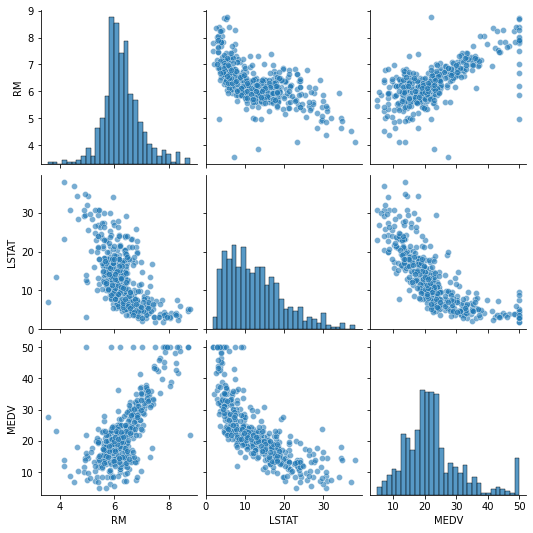

In [23]:
sns.pairplot(boston[cols], 
             plot_kws={'alpha': 0.6},
             diag_kws={'bins': 30})

RM and MEDV have the closest shape to normal distributions

**3.**

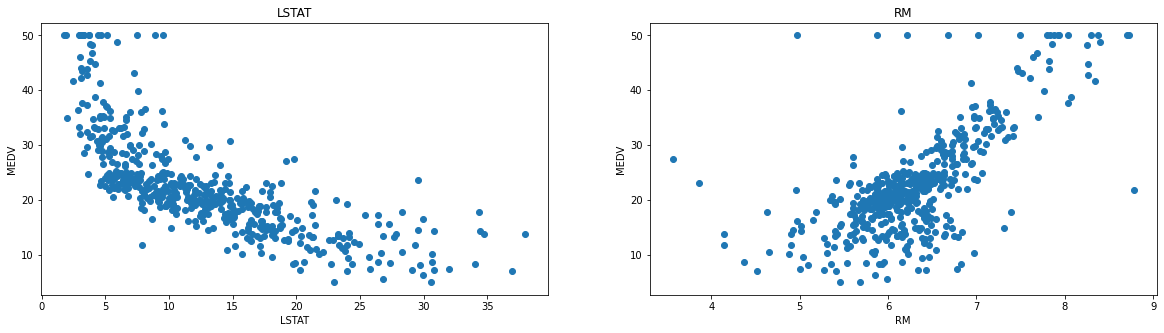

In [21]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [27]:
x_rooms = boston.RM
y_lstat = boston.LSTAT


x_rooms = np.array(x_rooms).reshape(-1,1)
y_lstat = np.array(y_lstat).reshape(-1,1)

print(x_rooms.shape)
print(y_lstat.shape)

(506, 1)
(506, 1)


In [29]:
from sklearn.model_selection import train_test_split, cross_val_score

In [31]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(x_rooms, y_lstat, test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)
reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

(404, 1)
(102, 1)
(404, 1)
(102, 1)
The model performance for training set
--------------------------------------
RMSE is 5.720761301952755
R2 score is 0.34




In [32]:
y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 5.302499679166488
R^2: 0.5




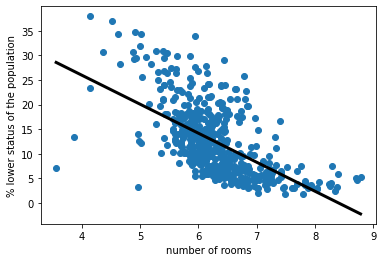

In [33]:
prediction_space = np.linspace(min(x_rooms), max(x_rooms)).reshape(-1,1) 
plt.scatter(x_rooms,y_lstat)
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('% lower status of the population')
plt.xlabel('number of rooms')
plt.show()

In [34]:
a_0 = clf.intercept_ + clf.coef_[0] # intercept
a_1, a_2, a_3 = clf.coef_[1:] 		# other coefficients
msg = 'model: y = {:.3f} + {:.3f}x + {:.3f}x^2 + {:.3f}x^3'\
		.format(a_0, a_1, a_2, a_3)
print(msg)

model: y = 48.650 + -3.866x + 0.149x^2 + -0.002x^3


In [37]:
y_pred = clf.predict(x_poly)
resid_MEDV = y - y_pred
print(resid_MEDV[:10], '....')

0    -8.840257
1    -2.613603
2    -0.655778
3    -5.119496
4     4.231912
5    -3.563871
6     3.167289
7    12.003364
8     4.033489
9     2.879154
Name: MEDV, dtype: float64 ....
